In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# pd.options.display.float_format = '{:.2f}'.format
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
# sp500.to_csv("sp500.csv")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,0.0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,0.0
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24162, freq=None)

<Axes: xlabel='Date'>

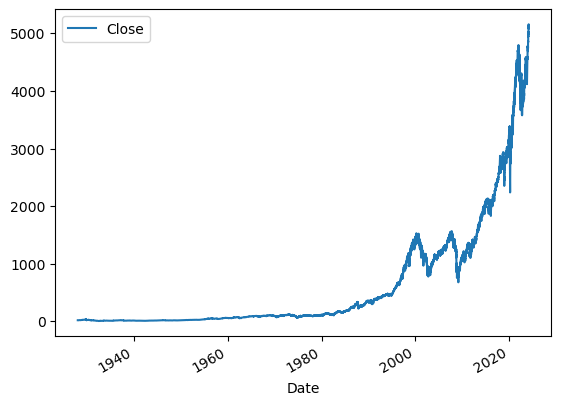

In [5]:
sp500.plot.line(y="Close", use_index = True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomarrow"] = sp500["Close"].shift(-1)
sp500["EMA"] = sp500["Volume"].ewm(span=5, adjust=False).mean().astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomarrow,EMA
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,5078.649902,4549207431
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,5104.759766,4505608287
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,5157.359863,4523422191


In [9]:
sp500["Target"] = (sp500["Close"]<sp500["Tomarrow"]).astype(int)

In [10]:
sp500=sp500.dropna()

In [11]:
sp500=sp500.loc["1990-1-1":].copy()

In [12]:
import sklearn

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [14]:
from sklearn.metrics import precision_score, accuracy_score
print("Precision: ", precision_score(test["Target"], preds))
print("Accuracy: ", accuracy_score(test["Target"], preds))

Precision:  0.5384615384615384
Accuracy:  0.41


In [15]:
new_data=sp500.tail(1)

In [16]:
new_data

,Open,High,Low,Close,Volume,Tomarrow,EMA,Target
Date,,,,,,,,
2024-03-07 00:00:00-05:00,5132.379883,5165.620117,5128.209961,5157.359863,4137980000,5123.689941,4394941461,0


In [17]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

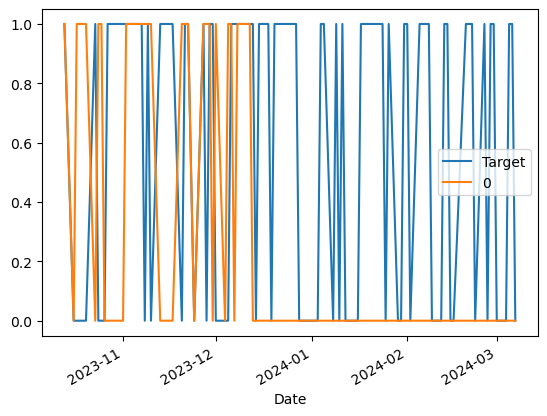

In [18]:
combined.plot()

In [19]:
feature_imp=pd.Series(model.feature_importances_).sort_values(ascending=False)
print(feature_imp[:10])

1    0.234747
4    0.197489
0    0.192379
3    0.188067
2    0.187318
dtype: float64


In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    3509
1    2602
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534937
0    0.465063
Name: count, dtype: float64

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
   
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [27]:
sp500=sp500.dropna()

In [28]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [30]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    4281
1.0     830
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5734939759036145

In [33]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.544707
0    0.455293
Name: count, dtype: float64

In [34]:
feature_imp=pd.Series( model.feature_importances_).sort_index(ascending=True)
print(feature_imp[:15])

0    0.158766
1    0.014053
2    0.154733
3    0.031191
4    0.147085
5    0.059393
6    0.135415
7    0.081173
8    0.133514
9    0.084679
dtype: float64


In [35]:
new_data = sp500.tail(1)

In [36]:
new_data

,Open,High,Low,Close,Volume,Tomarrow,EMA,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2024-03-07 00:00:00-05:00,5132.379883,5165.620117,5128.209961,5157.359863,4137980000,5123.689941,4394941461,0,1.005126,2.0,1.006951,3.0,1.056214,38.0,1.158412,141.0,1.272604,534.0


In [37]:
del new_data['Open']
del new_data['High']
del new_data['Low']
del new_data['Close']
del new_data['Volume']
del new_data['Tomarrow']
del new_data['EMA']
del new_data['Target']

In [38]:
new_data

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,
2024-03-07 00:00:00-05:00,1.005126,2.0,1.006951,3.0,1.056214,38.0,1.158412,141.0,1.272604,534.0


In [39]:
res=model.predict(new_data)

In [40]:
res

array([0])